In [1]:
%pwd

'e:\\Personal Files\\Learning Programming\\Data Science\\Projects\\Sentiment_Analysis\\Experiment'

In [2]:
import os
os.chdir("../")

In [3]:
os.getcwd()

'e:\\Personal Files\\Learning Programming\\Data Science\\Projects\\Sentiment_Analysis'

## 1. Data Collection

In [4]:
import pandas as pd
df = pd.read_csv("Dataset/sentiment_analysis_final_dataset.csv")
df.head()

,text,label,label_name
0,My heart is full of joy and contentment right ...,0,Joy
1,I'm beaming with pride after this incredible a...,0,Joy
2,I'm overwhelmed by this profound sense of loss.,4,Sad
3,This deliberate sabotage has pushed me over th...,3,Angry
4,What a beautiful sunny day to be alive!,0,Joy


In [5]:
df.shape

(33280, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33280 entries, 0 to 33279
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        33280 non-null  object
 1   label       33280 non-null  int64 
 2   label_name  33280 non-null  object
dtypes: int64(1), object(2)
memory usage: 780.1+ KB


In [7]:
df.isnull().sum()

text          0
label         0
label_name    0
dtype: int64

In [8]:
df.describe(include="all")

,text,label,label_name
count,33280,33280.000000,33280
unique,11815,NaN,5
top,Outraged by unfair treatment and injustice.,NaN,Joy
freq,303,NaN,8363
mean,NaN,1.977494,NaN
std,NaN,1.520201,NaN
min,NaN,0.000000,NaN
25%,NaN,0.000000,NaN
50%,NaN,2.000000,NaN
75%,NaN,3.000000,NaN


In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['text', 'label', 'label_name'], dtype='object')

In [10]:
df["label"].value_counts()

label
0    8363
4    7922
3    5959
1    5826
2    5210
Name: count, dtype: int64

In [11]:
df["label_name"].value_counts()

label_name
Joy      8363
Sad      7922
Angry    5959
Fear     5826
Love     5210
Name: count, dtype: int64

## 2. Dataset Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
label_counts = df["label_name"].value_counts(ascending=True)
label_counts

label_name
Love     5210
Fear     5826
Angry    5959
Sad      7922
Joy      8363
Name: count, dtype: int64

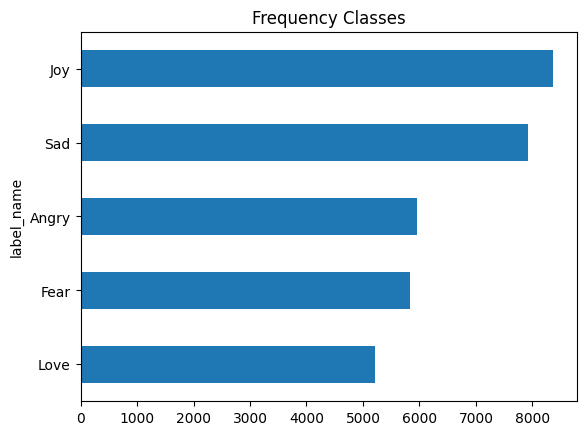

In [14]:
label_counts.plot.barh()
plt.title("Frequency Classes")
plt.show()

- Checking how many words are there in each text

In [15]:
df["words_per_tweet"] = df["text"].str.split().apply(len)
df.head()
df.to_csv("Dataset/sentiment_analysis_final_dataset_word_count.csv", index=False) 

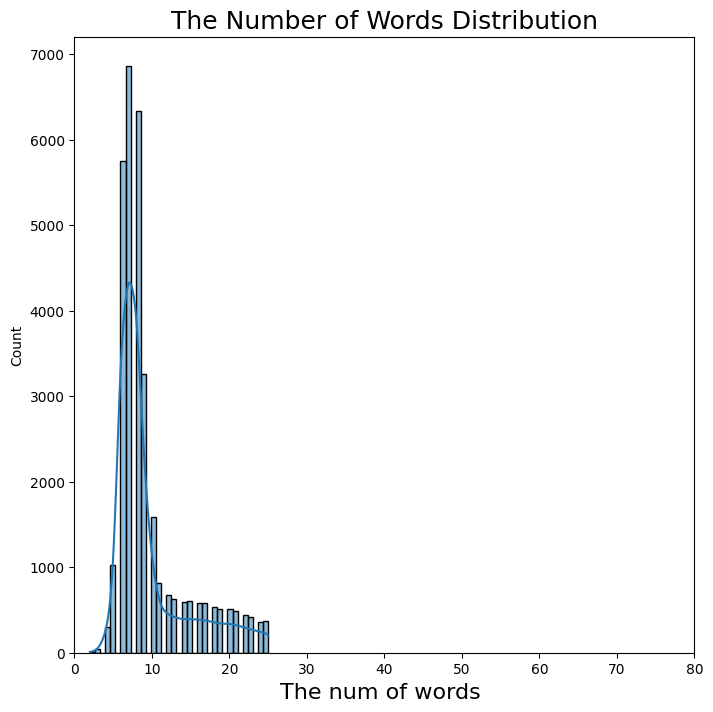

In [16]:
plt.figure(figsize= (8, 8))

sns.histplot(df['words_per_tweet'], bins=35, kde=True)

plt.xlim(0, 80)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

<Axes: title={'center': 'words_per_tweet'}, xlabel='label_name'>

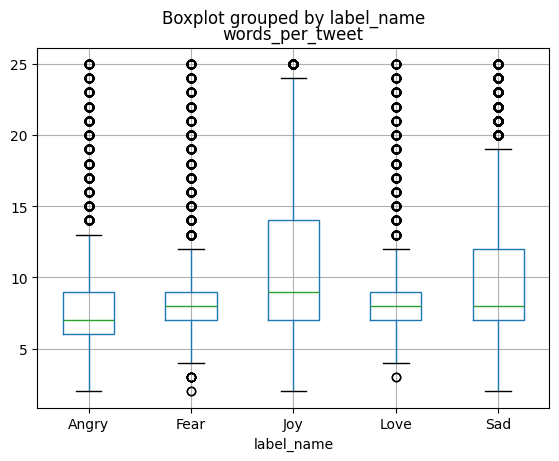

In [17]:
df.boxplot(column="words_per_tweet",by="label_name")

- We found in each text there is about 10-20 words present on average
- It is a skewed data

## 3. Data Loader and Train Test Split
- As Transformer cannot work with the Data Frame
- Need to Convert to the Data Set Dictornary

In [18]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.3, stratify=df["label_name"])
test,validation = train_test_split(test,test_size=1/3,stratify=test["label_name"])

train.shape, validation.shape, test.shape

((23296, 4), (3328, 4), (6656, 4))

In [19]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {
        "train":Dataset.from_pandas(train, preserve_index=False),
        "test":Dataset.from_pandas(test, preserve_index=False),
        "validation":Dataset.from_pandas(validation, preserve_index=False)
    }
)
dataset

e:\Personal Files\Learning Programming\Data Science\ds-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 23296
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 6656
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 3328
    })
})

## 3. Tokenize the Dataset
 -map() method would be used

In [20]:
import tqdm # for showing the progress bar
from transformers import BertTokenizer
model_ckpt = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_ckpt)
def tokenize(batch):
  temp =tokenizer(batch['text'], padding='max_length', truncation=True, max_length=40)
  return temp

print(tokenize(dataset["train"][:2]))

{'input_ids': [[101, 1045, 2074, 2066, 2308, 2017, 2036, 2514, 2023, 2003, 2010, 3606, 3993, 19647, 2791, 5956, 6180, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2514, 2066, 1996, 2518, 2008, 1045, 2655, 2019, 6018, 11765, 1999, 2870, 2003, 2428, 2074, 2474, 21254, 4757, 1998, 6583, 11890, 14643, 2964, 16114, 2075, 1998, 16003, 2169, 2060, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [21]:
encoded_dataset = dataset.map(tokenize,batched=True,remove_columns=["label_name","words_per_tweet"])
encoded_dataset = encoded_dataset.rename_column("label", "labels")
encoded_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])


Map: 100%|██████████| 3328/3328 [00:00<00:00, 3670.20 examples/s]


In [22]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 23296
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6656
    })
    validation: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3328
    })
})

## 4. Model Building (Pretrained BERT for Sequence Classification)

In [23]:
#lable2id and id2lable
label2id = {x["label_name"]:x["label"] for x in dataset["train"]}
id2label = {v:k for k,v in label2id.items()}

In [24]:
label2id,id2label

({'Joy': 0, 'Angry': 3, 'Sad': 4, 'Fear': 1, 'Love': 2},
 {0: 'Joy', 3: 'Angry', 4: 'Sad', 1: 'Fear', 2: 'Love'})

In [25]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=5,
    id2label=id2label,
    label2id=label2id
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [27]:
model.config.label2id

{'Joy': 0, 'Angry': 3, 'Sad': 4, 'Fear': 1, 'Love': 2}

## 5. Define Training Arguments

In [28]:
from transformers import TrainingArguments

batch_size = 64
training_dir = "./model_result"

training_arg = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    num_train_epochs=3,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=1e-5,
    disable_tqdm=False,
    eval_strategy="steps",              # replaces evaluate_during_training
    save_strategy="steps",# replaces evaluate_during_training
    eval_steps=100,
    load_best_model_at_end=True
)

## 6. Build Compute Matrix

In [29]:
# using Evalutae
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions,axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# using sklearn
from sklearn.metrics import accuracy_score,f1_score

def compute_metrics_sklearn(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels,preds)
    
    return {"accuracy":acc , "f1" : f1}

## 7. Initialize Trainer

In [30]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    args=training_arg,
    compute_metrics=compute_metrics_sklearn,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['validation'],
    tokenizer=tokenizer
)

C:\Users\SUMIT\AppData\Local\Temp\ipykernel_26348\3453222189.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


## 8. Fine Tune Model

In [31]:
import torch
torch.cuda.empty_cache()
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1
100,No log,0.278232,0.921875,0.921871
200,No log,0.149096,0.954026,0.953971
300,No log,0.110257,0.966046,0.966062
400,No log,0.103759,0.967849,0.967816
500,0.258400,0.090949,0.973858,0.973827
600,0.258400,0.077442,0.971755,0.971741
700,0.258400,0.069795,0.975361,0.975352
800,0.258400,0.074884,0.974760,0.974740
900,0.258400,0.072226,0.976562,0.976559
1000,0.041600,0.072492,0.976562,0.976544


TrainOutput(global_step=1092, training_loss=0.13997600672445892, metrics={'train_runtime': 1075.6258, 'train_samples_per_second': 64.974, 'train_steps_per_second': 1.015, 'total_flos': 1436625057853440.0, 'train_loss': 0.13997600672445892, 'epoch': 3.0})

## 7. Model Evaluation

In [32]:
preds_outputs = trainer.predict(encoded_dataset['test'])
preds_outputs.metrics

{'test_loss': 0.08807368576526642,
 'test_accuracy': 0.9741586538461539,
 'test_f1': 0.9741607416265305,
 'test_runtime': 29.8451,
 'test_samples_per_second': 223.018,
 'test_steps_per_second': 3.485}

In [33]:
preds_outputs.predictions

array([[-1.4508628 , -0.8551244 , -1.4878109 ,  5.4001813 , -1.7231914 ],
       [-1.5347655 , -0.4152317 , -1.2984447 ,  5.104641  , -1.7860866 ],
       [-1.5419248 , -1.6245731 ,  5.4496236 , -1.467318  , -1.4739988 ],
       ...,
       [-0.9555771 , -0.8314968 , -1.5353558 , -1.1677028 ,  5.8777366 ],
       [-0.81161714,  5.893933  , -0.9767536 , -1.0399035 , -0.44013605],
       [-1.2610735 , -0.6001154 , -1.2689872 , -1.2300264 ,  5.896839  ]],
      dtype=float32)

In [35]:
y_pred = np.argmax(preds_outputs.predictions, axis=1)
y_true = encoded_dataset["test"][:]["labels"]

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1673
           1       0.96      0.99      0.97      1165
           2       0.97      0.97      0.97      1042
           3       0.98      0.97      0.98      1192
           4       0.98      0.98      0.98      1584

    accuracy                           0.97      6656
   macro avg       0.97      0.97      0.97      6656
weighted avg       0.97      0.97      0.97      6656



In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

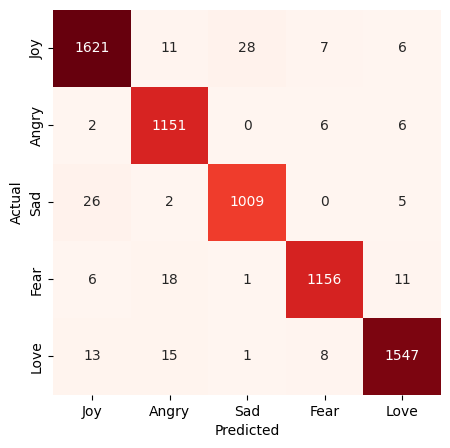

In [38]:
cm = confusion_matrix(y_true,y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=list(label2id.keys()), yticklabels=list(label2id.keys()), fmt = "d", cbar = False, cmap="Reds")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## 8. Save Model

In [39]:
save_directory = './result'
tokenizer.save_pretrained(save_directory)
trainer.save_model(save_directory)


## 9. Prediction

In [ ]:
save_directory = './artifacts'
from transformers import BertForSequenceClassification, BertTokenizer

model_saved = BertForSequenceClassification.from_pretrained(save_directory)
tokenizer_saved = BertTokenizer.from_pretrained(save_directory)

In [ ]:


def predict_emotion(text):
    inputs = tokenizer_saved(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    outputs = model_saved(**inputs)
    pred_id = outputs.logits.argmax(dim=-1).item()
    return model_saved.config.id2label[pred_id]

print(predict_emotion("I feel so loved!"))  # → Love

{'input_ids': tensor([[ 101, 1045, 2572, 3565, 3407, 2651, 1012, 1045, 2288, 2009, 2589, 1012,
         2633,  999,  999,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


AttributeError: 'BaseModelOutputWithPoolingAndCrossAttentions' object has no attribute 'argmax'